![Logotipo: Ilum- Escola de Ciências, Centro nacional de Pesquisa em Energia e Materiais(CNPEM), Misnistério da Educação, MCTI, Governo Federal: Brasil](https://github.com/MEmilyGomes/PCD---Criptografia-RSA/assets/172424897/8ab16e3d-9b90-4e14-b4ae-af54178c31fd) 

# <center> 🩷🎗️Rede Neural Profunda para Classificação de Tumor Mamário

<b>Autores:</b> Letícia A. Nunes e Pedro C. G. de Freitas <br>
<b>Disciplina:</b> Redes Neurais e Algoritmos Genéticos <br>
<b>Professor:</b> Dr. Daniel R. Cassar <br>
<b>Período:</b> 2025.1 <br>

---

## Introdução

O câncer de mama é uma condição neoplástica caracterizada pela proliferação desordenada de células mamárias anormais. De acordo com a Organização Mundial da Saúde, mais de 2.3 milhões de mulheres foram diagnosticadas com câncer de mama em 2022, o que o torna o tipo de câncer mais prevalente na população feminina. Além disso, em 95% dos países, o câncer de mama é a primeira ou a segunda principal causa de morte por câncer em mulheres. [1, 2]

Nesse contexto, a detecção preventiva do tumor pode reduzir os gastos com sistema de saúde público, além da quantidade de mortes associadas a essa doença. Para isso, diversos exames para investigação preventiva do câncer de mama – como mamografia, imageamento por ressonância magnética ou por tomografia computadorizada, por exemplo – são utilizados para mapeamento dos casos. No entanto, os métodos tradicionais de detecção do câncer de mama enfrentam desafios, como a complexidade das imagens mamográficas e a possibilidade de resultados falso-negativos na identificação do tipo de tumor, devido às dificuldades em identifica-los nos estágios iniciais da doença.

Recentemente, modelos de aprendizado profundo têm sido explorados para a detecção do câncer de mama. Esses modelos têm a capacidade de aprender características complexas e hierárquicas, aumentando a sensibilidade e a especificidade na detecção, o que contribui para um diagnóstico mais precoce e preciso. Na literatura, muitos estudos têm adotado redes neurais para a classificação do câncer de mama, seja para identificar subtipos ou para diferenciar casos benignos de malignos. 

O objetivo deste estudo é desenvolver e avaliar redes neurais otimizadas, especificamente MLP (Perceptron Multicamadas), utilizando técnicas de aprendizado profundo para classificar tumores de mama como benignos ou malignos, com base em dados extraídos de imagens de mamografias. Para isso, serão exploradas técnicas para evitar sobreajuste do modelo, bem como a aplicação do algoritmo Optuna para otimização dos hiperparâmetros.

Para isso, utilizaremos um [dataset](https://www.kaggle.com/datasets/adhamelkomy/breast-cancer) da plataforma *Kaggle* com informações sobre tumores mamários extraídas a partir de mamografias. Com base nas características do tumor (como diâmetro médio, textura, simetria etc), tentaremos prever se este é benigno ou maligno.

### Atributos

`Radius Mean`: Média das distâncias do centro para pontos no perímetro. <br>
`Texture Mean`: Desvio padrão do valores da escala de cinza. <br>
`Perimeter Mean`: Tamanho médio do tumor central. <br>
`Area Mean`: Área média do tumor central. <br>
`Smoothness Mean`: Suavidade média dos núcleos celulares. <br>
`Compactness Mean`: Compactação média dos núcleos celulares. <br>
`Concavity Mean`: Concavidade média dos núcleos celulares. <br>
`Concave Points Mean`: Número médio de partes côncavas do contorno. <br>
`Symmetry Mean`: Simetria média dos núcleos celulares. <br>
`Fractal Dimension Mean`: Média do perímetro aproximado - 1. <br>

### Target
`Diagnosis`: Diagnóstico da massa mamária - Maligno $\rightarrow$ "M"; Benigno $\rightarrow$ "B". (O diagnóstico foi realizado, originalmente, a partir de biópsia)

---

## Importação das bibliotecas

Inicialmente, iremos importar as bibliotecas necessárias para realização deste trabalho. Nesse sentido, utilizaremos as bibliotecas <code>pandas</code>, <code>numpy</code> e <code>matplotlib pyplot</code> para importação do dataset, tratamento dos dados e visualização. Além disso, utilizaremos a biblioteca do <code>Scikit-Learn</code> para conversão do target em binário, além do normalizador por MaxAbsScaler. Para a rede neural, utilizaremos o pacote <code>PyTorch</code> para treinamento do modelo e o <code>Optuna</code> para otimização de hiperparâmetros.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import torch
import torch.nn as nn

import optuna
from optuna import create_study

## Importação do dataset e pré-processamento dos dados

Os dados estão disponíveis para download no site [_Kaggle_](https://www.kaggle.com/datasets/adhamelkomy/breast-cancer) e no [nosso _GitHub_](https://github.com/leticiaalmnunes/RN_tumor_mamario).

Abaixo, separaremos os dados em treino, teste e validação e, em seguida, os transformaremos em tensores.

In [2]:
df = pd.read_csv("cancer_mama.csv")

label_encoder = LabelEncoder()

df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])
df.drop(columns=["id"], inplace=True)

X = df.drop(columns=["diagnosis"]).values
y = df["diagnosis"].values

normalizador = MaxAbsScaler()
X_normalizado = normalizador.fit_transform(X)

display(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X_treino, X_teste_validacao, y_treino, y_teste_validacao = train_test_split(
    X_normalizado, y, test_size=0.3, random_state=69, stratify=y
)

X_teste, X_validacao, y_teste, y_validacao = train_test_split(
    X_teste_validacao,
    y_teste_validacao,
    test_size=0.5,
    random_state=69,
    stratify=y_teste_validacao,
)

In [4]:
X_treino = torch.tensor(X_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32).view(-1, 1)

X_validacao = torch.tensor(X_validacao, dtype=torch.float32)
y_validacao = torch.tensor(y_validacao, dtype=torch.float32).view(-1, 1)

X_teste = torch.tensor(X_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32).view(-1, 1)

## Otimização dos hiperparâmetros

### Hiperparâmetros e espaço de busca
`OTIMIZADOR`: Otimizadores. Opções: ['SGD', 'Adam'] <br>
`TAXA_APRENDIZADO`: Taxa de aprendizado da rede. Opções: [$10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}$] <br>
`DROPOUT_RATE`: Taxa de *dropout*. Opções: [0.05, 0.1, 0.2, 0.3] <br>
`FUNC_ATIVACAO`: Função de ativação dos neurônios. Opções: ['sigmoid', 'ReLU'] <br>
`NUM_CAMADAS`: Número de camadas ocultas. Opções: [2 a 10] <br>
`NUM_NEURONIOS`: Número de neurônios por camada. Opções: [1 a 50] <br>

Definindo os valores de busca que serão testados no estudo do _Optuna_:

In [5]:
def cria_instancia_modelo(trial, tamanho_entrada, tamanho_saida):

    parametros = {
        "taxa_aprendizado": trial.suggest_categorical(
            "taxa_aprendizado", [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
        ),
        "num_camadas": trial.suggest_int("num_camadas", 2, 10),
        "num_neuronios": trial.suggest_int("num_neuronios", 1, 50),
        "otimizador": trial.suggest_categorical(
            "otimizador", ["SGD", "Adam", "RMSProp"]
        ),
        "dropout_rate": trial.suggest_categorical(
            "dropout_rate", [0.05, 0.1, 0.2, 0.3]
        ),
        "func_ativacao": trial.suggest_categorical(
            "func_ativacao", ["sigmoid", "relu"]
        ),
    }

    modelo = MLP(
        num_dados_entrada=tamanho_entrada,
        num_camadas=parametros["num_camadas"],
        num_neuronios=parametros["num_neuronios"],
        dropout_rate=parametros["dropout_rate"],
        ativacao=parametros["func_ativacao"],
        num_targets=tamanho_saida,
    )

    learning_rate = parametros["taxa_aprendizado"]

    if parametros["otimizador"] == "SGD":
        otimizador = torch.optim.SGD(modelo.parameters(), lr=learning_rate)
    elif parametros["otimizador"] == "Adam":
        otimizador = torch.optim.Adam(modelo.parameters(), lr=learning_rate)
    elif parametros["otimizador"] == "RMSProp":
        otimizador = torch.optim.RMSprop(modelo.parameters(), lr=learning_rate)

    return modelo, otimizador

### Criando a MLP

In [6]:
class MLP(nn.Module):
    def __init__(
        self,
        num_dados_entrada,
        num_camadas,
        num_neuronios,
        dropout_rate,
        ativacao,
        num_targets,
    ):

        super().__init__()

        self.camadas = nn.ModuleList()

        funcoes_ativacao = {
            "relu": nn.ReLU(),
            "sigmoid": nn.Sigmoid(),
        }

        funcao_de_ativacao = ativacao

        # -#-#-#-#-#-# CAMADA DE ENTRADA #-#-#-#-#-#-#

        self.camadas.append(nn.Linear(num_dados_entrada, num_neuronios))
        self.camadas.append(funcoes_ativacao[ativacao])
        self.camadas.append(nn.Dropout(dropout_rate))

        # -#-#-#-#-#-# CAMADAS OCULTAS #-#-#-#-#-#-#

        for _ in range(num_camadas - 1):
            self.camadas.append(nn.Linear(num_neuronios, num_neuronios))
            self.camadas.append(funcoes_ativacao[ativacao])
            self.camadas.append(nn.Dropout(dropout_rate))

        # -#-#-#-#-#-# CAMADA FINAL #-#-#-#-#-#-#

        self.camadas.append(nn.Linear(num_neuronios, num_targets))
        self.camadas.append(nn.Sigmoid())

    def forward(self, x):
        for camada in self.camadas:
            x = camada(x)
        return x

A função <b>`treinar_MLP`</b> é a responsável pelo treino da rede, realizando as etapas de: _passfoward_, _backpropagation_ e validação. É nela também que atualizamos qual o melhor modelo encontrado até o momento na otimização.

Visando reduzir a chance de sobreajuste, adicionamos um critério de parada antecida.

In [7]:
def treinar_MLP(
    modelo,
    X_treino,
    y_treino,
    X_validacao,
    y_validacao,
    criterio,
    otimizador,
    max_epocas,
    paciencia,
    delta,
):

    melhor_loss = float("inf")
    sem_melhora = 0
    perda_validacao = []

    for epoca in range(max_epocas - 1):
        modelo.train()
        otimizador.zero_grad()
        saida = modelo(X_treino)
        perda = criterio(saida, y_treino)
        perda.backward()
        otimizador.step()

        modelo.eval()

        with torch.no_grad():
            val_saida = modelo(X_validacao)
            val_perda = criterio(val_saida, y_validacao)
            perda_validacao.append(val_perda.item())

        if val_perda.item() < melhor_loss:
            melhor_loss = val_perda.item()
            melhor_modelo = modelo.state_dict()

        ultimo_valor = val_perda.item()
        penultimo_indice = len(perda_validacao) - 2
        penultimo_valor = perda_validacao[penultimo_indice]

        diferenca = abs(ultimo_valor - penultimo_valor)

        if diferenca <= delta:
            sem_melhora += 1
        else:
            sem_melhora = 0

        if sem_melhora == paciencia:
            break

        modelo.load_state_dict(melhor_modelo)

    return modelo

**Função objetivo** e **Função objetivo parcial**

Para avaliar o modelo, temos a função objetivo que chama a função <b>`treinar_MLP`</b> e calcula a acurácia da previsão com os dados de validação. No entanto, como o módulo _Optuna_ requer uma função objetivo que receba apenas o `trial`, criamos a função <b>`funcao_objetivo_parcial`</b> para ser usada no estudo.

In [8]:
def funcao_objetivo(
    trial, X_treino, y_treino, X_validacao, y_validacao, max_epocas, paciencia
):
    tamanho_entrada = X_treino.shape[1]
    tamanho_saida = y_treino.shape[1]
    criterio = nn.BCELoss()

    modelo, otimizador = cria_instancia_modelo(trial, tamanho_entrada, tamanho_saida)
    modelo_treinado = treinar_MLP(
        modelo,
        X_treino,
        y_treino,
        X_validacao,
        y_validacao,
        criterio,
        otimizador,
        max_epocas,
        paciencia,
        delta,
    )

    modelo_treinado.eval()

    with torch.no_grad():
        prob = modelo(X_validacao)
        pred = (prob > 0.5).int()

    acuracia = accuracy_score(y_validacao, pred)

    return acuracia


def funcao_objetivo_parcial(trial):
    return funcao_objetivo(
        trial, X_treino, y_treino, X_validacao, y_validacao, max_epocas, paciencia
    )

Com as funções acima definidas, agora é possível realizar a otimização dos hiperparâmetros.

O arquivo `"mlp_optuna_cancer_v5.db"` está disponível para download no [_GitHub_](https://github.com/leticiaalmnunes/RN_tumor_mamario) do projeto.

In [9]:
max_epocas = 1000
paciencia = 20
delta = 0.05

NOME_DO_ESTUDO = "mlp_optuna_cancer_v5"
objeto_de_estudo = create_study(
    direction="maximize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

# objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=100)

[I 2025-06-12 22:47:06,996] Using an existing study with name 'mlp_optuna_cancer_v5' instead of creating a new one.


Visualizando o melhor conjunto de hiperparâmetros encontrado e instanciando o modelo:

In [10]:
tamanho_entrada = X_treino.shape[1]
tamanho_saida = 1

melhor_trial = objeto_de_estudo.best_trial

print(f"Os melhores parâmetros encontrados com o optuna foram: {melhor_trial.params}")

modelo_final, otimizador_final = cria_instancia_modelo(
    melhor_trial, tamanho_entrada, tamanho_saida
)

Os melhores parâmetros encontrados com o optuna foram: {'taxa_aprendizado': 0.01, 'num_camadas': 5, 'num_neuronios': 35, 'otimizador': 'Adam', 'dropout_rate': 0.05, 'func_ativacao': 'relu'}


Finalmente, podemos treinar a MLP com os hiperparâmetros selecionados. A função <b>`treinar_MLP_final`</b> é semelhante à função <b>`treinar_MLP`</b>, apenas removendo a atualização do objeto `melhor_modelo`.

In [11]:
def treinar_MLP_final(
    modelo,
    X_treino,
    y_treino,
    X_validacao,
    y_validacao,
    criterio,
    otimizador,
    max_epocas,
    paciencia,
    delta,
):

    # melhor_loss = float("inf")
    sem_melhora = 0
    perda_treino = []
    perda_validacao = []

    for epoca in range(max_epocas - 1):
        modelo.train()
        otimizador.zero_grad()
        saida = modelo(X_treino)
        perda = criterio(saida, y_treino)
        perda_treino.append(perda.item())
        perda.backward()
        otimizador.step()

        modelo.eval()

        with torch.no_grad():
            val_saida = modelo(X_validacao)
            val_perda = criterio(val_saida, y_validacao)
            perda_validacao.append(val_perda.item())

        # if val_perda.item() < melhor_loss:
        #     melhor_loss = val_perda.item()
        #     melhor_modelo = modelo.state_dict()

        ultimo_valor = val_perda.item()
        penultimo_indice = len(perda_validacao) - 2
        penultimo_valor = perda_validacao[penultimo_indice]

        diferenca = abs(ultimo_valor - penultimo_valor)

        if diferenca <= delta:
            sem_melhora += 1
        else:
            sem_melhora = 0

        if sem_melhora == paciencia:
            break

        # modelo.load_state_dict(melhor_modelo)

    return modelo, (perda_treino, perda_validacao)

Treinando o modelo final:

In [12]:
modelo_final, perdas = treinar_MLP_final(
    modelo_final,
    X_treino,
    y_treino,
    X_validacao,
    y_validacao,
    nn.BCELoss(),
    otimizador_final,
    max_epocas,
    paciencia,
    delta,
)

### Resultados

Nas células a seguir, podemos visualizar: a acurácia do modelo quando aplicado aos dados de teste; a função de perda ao longo das épocas nos dados de treino e validação; e a matriz de confusão dos diagnósticos realizados.

In [13]:
modelo_final.eval()
with torch.no_grad():
    saida_teste = modelo_final(X_teste)
    previsoes_teste = (saida_teste >= 0.5).float()

acuracia_teste = accuracy_score(y_teste.cpu(), previsoes_teste.cpu())
print(f"Acurácia no conjunto de teste: {round(acuracia_teste*100,2)}%")

Acurácia no conjunto de teste: 98.82%


Como observado acima, o modelo teve uma alta acurácia, apresentando 98.82% de acerto no conjunto de testes. Isso evidencia que a rede neural artificial treinada é robusta o suficiente para identificar padrões em dados nunca vistos durante o processo de treinamento, o que reforça sua capacidade de generalização e eficácia em cenários reais.

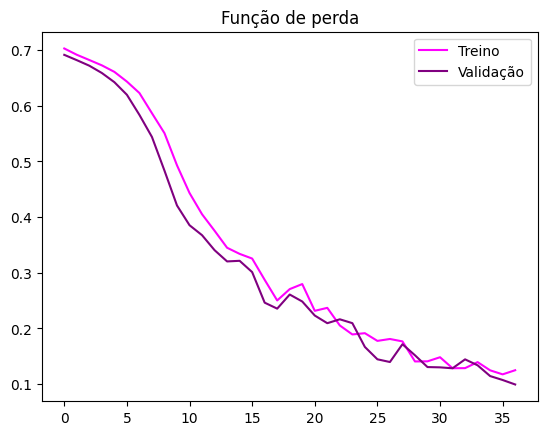

In [14]:
plt.plot([x for x in range(len(perdas[0]))], perdas[0], color="magenta", label="Treino")
plt.plot(
    [x for x in range(len(perdas[1]))], perdas[1], color="purple", label="Validação"
)
plt.title("Função de perda")
plt.legend()
plt.show()

O gráfico de função de perda acima mostra uma redução consistente nas perdas de treino e validação ao longo das épocas, com ambas as curvas se mantendo próximas, o que indica um bom aprendizado e ausência de overfitting. Esse bom comportamento é reforçado pela acurácia obtida na célula anterior, o que demonstra que o modelo é capaz de generalizar. Além disso, observa-se que as estratégias utilizadas para evitar o overfitting, como dropout e earlystopping foram eficazes para estabilidade do modelo e seu bom desempenho.

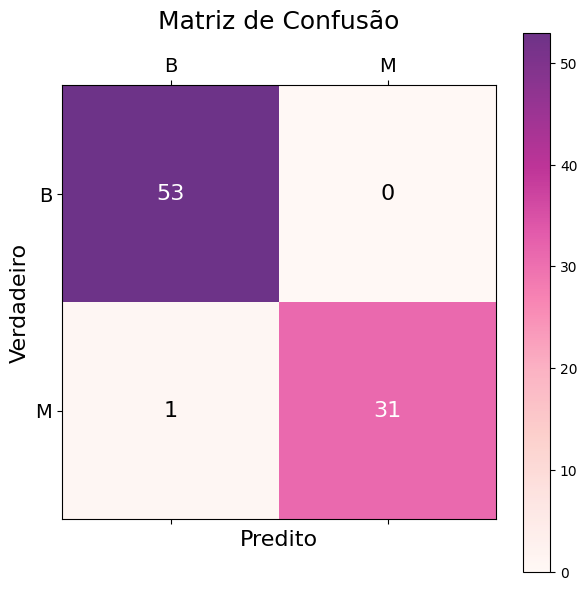

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = y_teste.cpu().numpy().reshape(-1)
y_pred = previsoes_teste.cpu().numpy().reshape(-1)

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
cax = ax.matshow(cm, cmap=plt.cm.RdPu, alpha=0.8)

for (i, j), val in np.ndenumerate(cm):
    ax.text(
        j,
        i,
        val,
        ha="center",
        va="center",
        fontsize=16,
        color="white" if val > cm.max() / 2 else "black",
    )

classes = ["B", "M"]

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, fontsize=14)
ax.set_yticklabels(classes, fontsize=14)

ax.set_xlabel("Predito", fontsize=16)
ax.set_ylabel("Verdadeiro", fontsize=16)
ax.set_title("Matriz de Confusão", fontsize=18, pad=20)

fig.colorbar(cax)

plt.show()

A matriz de confusão obtida acima demonstra que o modelo teve um desempenho satisfatório, classificando corretamente 53 tumores benignos e 31 malignos, com apenas um erro. A presença de poucos falsos negativos (um tumor maligno ser classificado como benigno) é importante quando se trata do contexto médico, uma vez que pode ter resultados clínicos indesejados, como a falta de tratamento para um tumor maligno.

## Conclusão

Dessa forma, podemos ver como as redes neurais artificiais têm grande potencial para colaborar com diagnósticos médicos a partir de informações extraídas de imagens. Neste projeto, observamos a capacidade de uma rede MLP em classificar tumores mamários como benignos ou malignos. Os resultados alcançados se mostraram promissores quanto à acurácia e à eficiência do modelo, reforçando a possibilidade de diagnósticos mais rápidos, precisos e menos invasivos, reduzindo, por exemplo, a necessidade de procedimentos doloros como biópsias.

Portanto, esperamos que o projeto aqui realizado sirva como contribuição para estudo do uso de redes neurais artificiais na área da saúde, incentivando futuras pesquisas e aplicações que possam auxiliar na tomada de decisões e melhorar a qualidade de vida dos pacientes.

## Referências

[1] Organização Mundial da Saúde (2024). Breat Cancer. Disponível em: https://www.who.int/news-room/fact-sheets/detail/breast-cancer

[2] Organização Mundial da Saúde (2024). WHO launches new roadmap on breast cancer. Disponível em:  https://www.who.int/news/item/03-02-2023-who-launches-new-roadmap-on-breast-cancer


[3] ELKOMY, Adham. Breast Cancer. Kaggle, 2022. Disponível em: https://www.kaggle.com/datasets/adhamelkomy/breast-cancer

[4] Optuna tutorial — Optuna 3.6.0 documentation. Disponível em: https://optuna.readthedocs.io/en/stable/tutorial/index.html